# Movie Review Classifier and Rating Predictor
- Data collected from IMDB Dataset, having reviews with sentiments (positive or negative)
- Split the data into training and testing(validating) data
- Preprocess the training data
    - Tokenization
    - Stopwords removal
    - Stemming
- Build Vocabulary (BoW - Bag of Words)
- Structure the train and test data so that models can be applied over them
- Build various models and then compare them
    - Model 1: BernoulliNB
    - Model 2: MultinomialNB
    - Model 3: Artificial Neural Network (ANN)
- Use best model to predict rating of a movie using its reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

### Data collection

In [2]:
# Read the data from CSV file
allReviews=pd.read_csv('IMDB Dataset.csv')

In [3]:
allReviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
allReviews.shape

(50000, 2)

In [5]:
# Extract reviews and sentiments from the data
X=allReviews['review']
y=allReviews['sentiment']

In [6]:
X.shape,y.shape

((50000,), (50000,))

### Split data into train and test data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Split the data into train(80%) and test(20%) 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape,y_train.shape

((40000,), (40000,))

In [10]:
X_test.shape,y_test.shape

((10000,), (10000,))

### Preprocess the training data
- Tokenization
- Stopwords removal
- Stemming

In [11]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [12]:
# Creating objects
myRegExpTokenizer=RegexpTokenizer('[a-z]+')
sw=stopwords.words('english')
sb=SnowballStemmer('english')

In [13]:
'not' in sw

True

In [14]:
sw.remove('not') # 'not' plays an important role in any review

In [15]:
X_train=list(X_train) # Converting to list

In [16]:
# Preprocessing Data
for i in range(len(X_train)):
    sentence=X_train[i].lower()
    sentence=myRegExpTokenizer.tokenize(sentence) # Tokenizing
    sentence=[word for word in sentence if word not in sw] # Stopwords removing
    for j in range(len(sentence)):
        sentence[j]=sb.stem(sentence[j]) # Stemming
    X_train[i]=' '.join(sentence)

In [17]:
X_train[:2]

['kept ask mani fight scream match swear general mayhem permeat minut comparison also stand think one dimension charact littl depth virtual imposs care happen bad written cypher director hang multicultur belief topic done much better drama tv cinema br br must confess not realli one spot bad perform film must said nichola burley heroin slutti best friend wasim zakir nasti bulli brother absolut terribl know act school graduat appli full refund post hast samina awan lead role manag impress cast call british talent probabl never hear least hope next time hire differ scout br br anoth intrigu thought hideous fashion soundtrack featur like snow patrol ian brown kean bit music fan familiar artist output recognis track movi apart omnipres run b side anyon get mani mani music montag telegraph suppos feel accompani startl origin imag coupl kiss swollen lake canoodl doorway problem none song convey mood effici realis director lack abil carri emot journey audienc storytel dialogu alon br br end p

### Build Vocabulary (BoW - Bag of Words)

In [18]:
# Using Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
# Creating object
tfidf=TfidfVectorizer()

In [20]:
# Let's fit_transform the reviews to build the vocab
vocab=tfidf.fit_transform(X_train)

In [21]:
vocab.shape

(40000, 61974)

In [22]:
vocab 

<40000x61974 sparse matrix of type '<class 'numpy.float64'>'
	with 3754646 stored elements in Compressed Sparse Row format>

### Structure trainData and testData(need Preprocessing) in proper format

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()

In [25]:
#training data
xtrainData=vocab
ytrainData=le.fit_transform(y_train) # To encode labels in outputs

In [26]:
#testing data
X_test=list(X_test) # Converting to list

In [27]:
# Preprocessing Data -> testing data need to be preprocessed similar to training data, prior to testing
for i in range(len(X_test)):
    sentence=X_test[i].lower()
    sentence=myRegExpTokenizer.tokenize(sentence) # Tokenizing
    sentence=[word for word in sentence if word not in sw] # Stopwords removing
    for j in range(len(sentence)):
        sentence[j]=sb.stem(sentence[j]) # Stemming
    X_test[i]=' '.join(sentence)

In [28]:
xtestData=tfidf.transform(X_test)
ytestData=le.fit_transform(y_test) # To encode labels in outputs

In [29]:
xtrainData.shape,ytrainData.shape

((40000, 61974), (40000,))

In [30]:
xtestData.shape,ytestData.shape

((10000, 61974), (10000,))

## Build models and compare them

In [31]:
from sklearn.metrics import plot_confusion_matrix # To plot confusion metrix

In [32]:
modelDict={
    1:'Bernoulli Naive Bayes',
    2:'Multinomial Naive Bayes',
    3:'Artificial Nerual Network (ANN)'
}
Accuracies=[]

### Model 1 - Bernoulli Naive Bayes

In [33]:
from sklearn.naive_bayes import BernoulliNB

In [34]:
bnb_model=BernoulliNB() # Creating object/ model

In [35]:
bnb_model.fit(xtrainData,ytrainData) # Training the model

BernoulliNB()

In [36]:
print(bnb_model.score(xtrainData,ytrainData)) # Accuracy on training data

0.886


In [37]:
acc_bnb=bnb_model.score(xtestData,ytestData) # Accuracy on testing data
Accuracies.append(acc_bnb)
print(acc_bnb)

0.8472


In [38]:
ytestPred_bnb=bnb_model.predict(xtestData) # Predict for test data

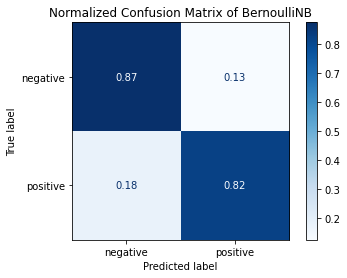

In [39]:
# Plot confusion matrix
confusionMatrix=plot_confusion_matrix(estimator=bnb_model,X=xtestData,y_true=ytestData,cmap=plt.cm.Blues,normalize='true',display_labels=le.classes_) # Plot the confusion matrix for given model
confusionMatrix.ax_.set_title('Normalized Confusion Matrix of BernoulliNB')
print(confusionMatrix)

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
ConfusionMatrixDisplay(confusionMatrix)

### Model 2 - Multinomial Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
mnb_model=MultinomialNB() # Creating object/ model

In [44]:
mnb_model.fit(xtrainData,ytrainData) # Training the model

MultinomialNB()

In [45]:
print(mnb_model.score(xtrainData,ytrainData)) # Accuracy on training data

0.895925


In [46]:
acc_mnb=mnb_model.score(xtestData,ytestData) # Accuracy on testing data
Accuracies.append(acc_mnb)
print(acc_mnb)

0.8607


In [47]:
ytestPred_mnb=mnb_model.predict(xtestData) # Predict for test data

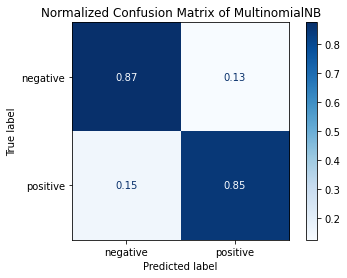

In [48]:
# Plot confusion matrix
confusionMatrix=plot_confusion_matrix(estimator=mnb_model,X=xtestData,y_true=ytestData,cmap=plt.cm.Blues,normalize='true',display_labels=le.classes_) # Plot the confusion matrix for given model
confusionMatrix.ax_.set_title('Normalized Confusion Matrix of MultinomialNB')
print(confusionMatrix)

### Model 3 - Artificial Neural Network (ANN)

In [49]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [50]:
model=Sequential() # Creating object/model

In [51]:
# Defining architecture of model
model.add(Dense(units=16,activation='relu',input_shape=(61974,))) # Input layer
model.add(Dropout(0.3)) # Hidden layer
model.add(Dense(units=32,activation='relu')) # Hidden layer
model.add(Dropout(0.4)) # Hidden layer
model.add(Dense(units=16,activation='relu')) # Hidden layer
model.add(Dropout(0.2)) # Hidden layer
model.add(Dense(units=8,activation='relu')) # Hidden layer
model.add(Dropout(0.1)) # Hidden layer
model.add(Dense(units=4,activation='relu')) # Hidden layer
model.add(Dense(units=2,activation='softmax')) # Output layer

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                991600    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1

In [53]:
# model compilation
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [54]:
from keras.utils import to_categorical

In [55]:
# Outputs need to be converted to categorical
ytrainDataCat=to_categorical(ytrainData)
ytestDataCat=to_categorical(ytestData)

In [56]:
print(ytrainDataCat.shape,ytestDataCat.shape)

(40000, 2) (10000, 2)


In [57]:
# Sort the sparse matrices based on thier indices
xtrainData.sort_indices()
xtestData.sort_indices()

In [58]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpnt=ModelCheckpoint('./best_model.h5',monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto') # Whenever val_accuaracy is increased then current model is saved
earlystop=EarlyStopping(monitor='val_accuracy',min_delta=0.005,patience=5,verbose=1,mode='auto',restore_best_weights=True) # If val_accuarcy is not improved by 0.005 for 5 epochs then it will early stop

In [59]:
hist=model.fit(x=xtrainData,y=ytrainDataCat,batch_size=32,epochs=10,validation_data=(xtestData,ytestDataCat),callbacks=[checkpnt,earlystop]) # Train the model

Epoch 1/10
1245/1250 [============================>.] - ETA: 0s - loss: 0.3581 - accuracy: 0.8509
Epoch 00001: val_accuracy improved from -inf to 0.89450, saving model to ./best_model.h5
1250/1250 [==============================] - 11s 9ms/step - loss: 0.3574 - accuracy: 0.8512 - val_loss: 0.2542 - val_accuracy: 0.8945
Epoch 2/10
1246/1250 [============================>.] - ETA: 0s - loss: 0.1878 - accuracy: 0.9309
Epoch 00002: val_accuracy did not improve from 0.89450
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1876 - accuracy: 0.9309 - val_loss: 0.2759 - val_accuracy: 0.8945
Epoch 3/10
1244/1250 [============================>.] - ETA: 0s - loss: 0.1215 - accuracy: 0.9552
Epoch 00003: val_accuracy did not improve from 0.89450
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1215 - accuracy: 0.9552 - val_loss: 0.3217 - val_accuracy: 0.8910
Epoch 4/10
1248/1250 [============================>.] - ETA: 0s - loss: 0.0846 - accuracy: 0.9682
Epoch 0

In [60]:
from keras.models import load_model

In [61]:
best_model=load_model('best_model.h5') # Load the best model with maximum val_accuracy

In [62]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                991600    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1

In [63]:
np.max(hist.history['val_accuracy']) # val_accuracy of best model

0.8945000171661377

In [64]:
hist.history['accuracy'][np.argmax(hist.history['val_accuracy'])] # accuracy of best model

0.8512499928474426

In [65]:
best_model.evaluate(xtrainData,ytrainDataCat) 

1250/1250 [==============================] - 3s 2ms/step - loss: 0.1589 - accuracy: 0.9465


[0.1589428186416626, 0.9465000033378601]

In [66]:
acc_ANN=best_model.evaluate(xtestData,ytestDataCat)[1]
Accuracies.append(acc_ANN)
print(acc_ANN)

313/313 [==============================] - 1s 2ms/step - loss: 0.2542 - accuracy: 0.8945
0.8945000171661377


In [67]:
ytestPred_ANN=model.predict_classes(xtestData) # Predict for test data

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [68]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
confusionMatrix=confusion_matrix(y_true=ytestData,y_pred=ytestPred_ANN,normalize='true') # Plot the confusion matrix for given model
print(confusionMatrix)

[[0.89195727 0.10804273]
 [0.10299663 0.89700337]]


## Predict rating of movie using reviews and best model

In [89]:
def predictRating(movieReviews):
    movieReviews=list(movieReviews)
    # Do same preprocessing as done for testing data
    for i in range(len(movieReviews)):
        sentence=movieReviews[i].lower()
        sentence=myRegExpTokenizer.tokenize(sentence) # Tokenizing
        sentence=[word for word in sentence if word not in sw] # Stopwords removing
        for j in range(len(sentence)):
            sentence[j]=sb.stem(sentence[j]) # Stemming
        movieReviews[i]=' '.join(sentence)
    
    # Transform the given reviews for model
    print(movieReviews)
    movieReviews=tfidf.transform(movieReviews)
    
    movieReviews.sort_indices()
    pred=best_model.predict_classes(movieReviews)
    print(pred)
    
    rating=int((pred.sum()/pred.shape[0])*5)
    
    return rating

In [70]:
# Just to show above function
# Lets take some reviews from allReviews to predict rating of movie XYZ
movieReviews=allReviews['review'].iloc[100:250]
print("Movie got",predictRating(movieReviews),"stars out of 5.")

Movie got 2 stars out of 5.


In [71]:
movieReviews=allReviews['review'].iloc[0:5]
print("Movie got",predictRating(movieReviews),"stars out of 5.")
print(allReviews.iloc[0:5,1])

Movie got 5 stars out of 5.
0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object


In [72]:
movieReviews=allReviews['review'].iloc[1550:1600]
print("Movie got",predictRating(movieReviews),"stars out of 5.")

Movie got 2 stars out of 5.


In [73]:
movieReviews=allReviews['review'].iloc[-5:]
print("Movie got",predictRating(movieReviews),"stars out of 5.")
print(allReviews.iloc[-5:,1])

Movie got 1 stars out of 5.
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, dtype: object


## Lets see which one is the best model, with what accuracy

In [74]:
print('Best accuracy is: ',np.max(Accuracies))
print('Best model is: ',modelDict[np.argmax(Accuracies)+1])

Best accuracy is:  0.8945000171661377
Best model is:  Artificial Nerual Network (ANN)


## Conclusion 
Artificial Neural Network (ANN) is the best model with highest <b>accuracy of 0.8909</b> for movie rating prediction

In [76]:
pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp37-none-any.whl size=6003 sha256=46b21d87e05149e906b7463ea375c5b8593406e72462381d2739804fd99ede28
  Stored in directory: C:\Users\HP\AppData\Local\pip\Cache\wheels\cd\05\42\71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [78]:
import pickle
#store the content
with open("tfidf.pkl", 'wb') as handle:
                    pickle.dump(tfidf, handle)
#load the content
#tfidf = pickle.load(open("tfidf.pkl", "rb" ) )

In [82]:
print(allReviews['review'].iloc[-5:])

49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, dtype: object


In [90]:
predictRating(["No one expects the Star Trek movies to be high art, but the fans do expect a movie that is as good as some of the best episodes. Unfortunately, this movie had a muddled, implausible plot that just left me cringing - this is by far the worst of the nine (so far) movies. Even the chance to watch the well known characters interact in another movie can't save this movie - including the goofy scenes with Kirk, Spock and McCoy at Yosemite.<br /><br />I would say this movie is not worth a rental, and hardly worth watching, however for the True Fan who needs to see all the movies, renting this movie is about the only way you'll see it - even the cable channels avoid this movie."])

['one expect star trek movi high art fan expect movi good best episod unfortun movi muddl implaus plot left cring far worst nine far movi even chanc watch well known charact interact anoth movi save movi includ goofi scene kirk spock mccoy yosemit br br would say movi not worth rental hard worth watch howev true fan need see movi rent movi way see even cabl channel avoid movi']
[0]


0